# Assignment on preprocessing

## Do the following on titanic dataset

In [ ]:
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find 
   the average accuracy score of the models

### 1. Load the dataset into python environment

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\illca\Downloads\titanic_dataset (1).csv")

### 2. Do all the necessary pre-processing steps

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#We are removing passenger Id since it will not make any difference in the machine learning model.

In [5]:
df=df.drop("PassengerId",axis=1)

In [6]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#here Survived is the target Variable

In [8]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [9]:
df.shape

(891, 11)

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [14]:
# Now we are checking for the null values and outliers

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

C:\Users\illca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


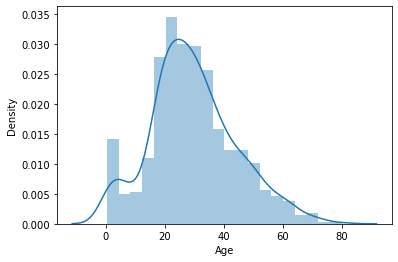

In [16]:
sns.distplot(df["Age"])
plt.show()

In [17]:
# it seems like a rightskew so we can take median to fill the missing values.

In [18]:
age_mid=df["Age"].median()

In [19]:
df["Age"]=df["Age"].fillna(age_mid)

In [20]:
#since cabin has 687 null values it is better to remove this coloumn cause it wont be better for our model.

In [21]:
df=df.drop("Cabin",axis=1)

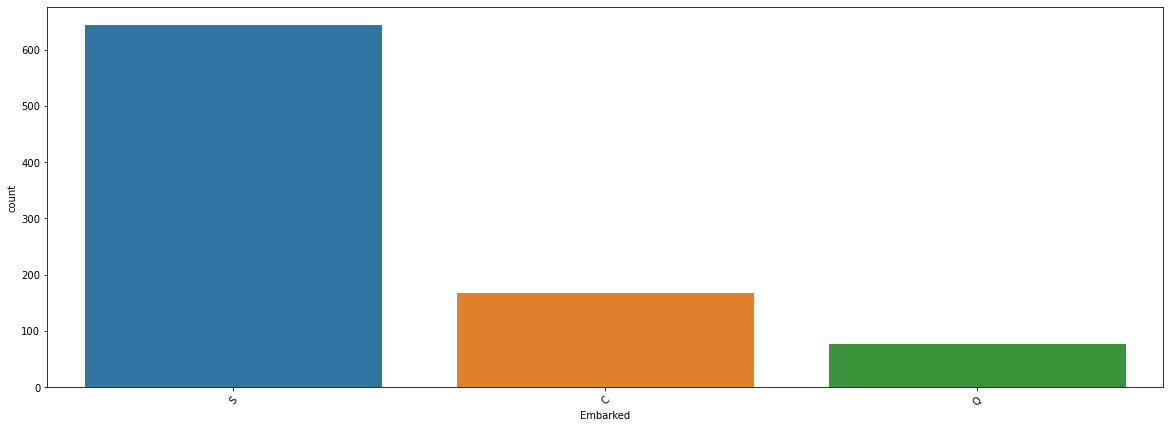

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x ='Embarked' , data = df)
plt.xticks(rotation = 45)
plt.show()

In [23]:
Emb_mode=df["Embarked"].mode()[0]

In [24]:
df["Embarked"]=df["Embarked"].fillna(Emb_mode)

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [26]:
#Now checking for the outliers

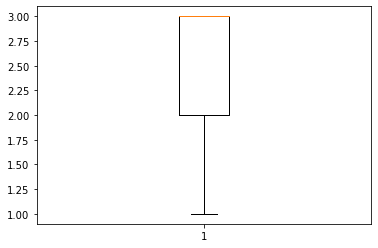

In [27]:
plt.boxplot(df["Pclass"])
plt.show()

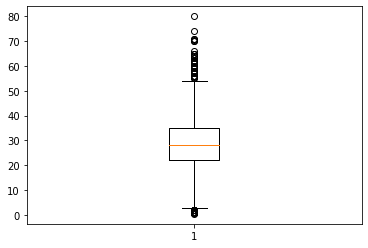

In [28]:
plt.boxplot(df["Age"])
plt.show()

In [29]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')

In [30]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [31]:
IQR=Q3-Q1
IQR

13.0

In [32]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [33]:
out=[]
for i in df["Age"]:
    if [i]>up_lim or [i]<low_lim:
        out.append(i)

In [34]:
ind_up_lim=df['Age']>up_lim
ind_low_lim=df['Age']<low_lim
outl_1=df.loc[ind_up_lim].index
outl_2=df.loc[ind_low_lim].index

In [35]:
outl_1

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [36]:
outl_2

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [37]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
df=df.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879,7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],axis=0)

In [39]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

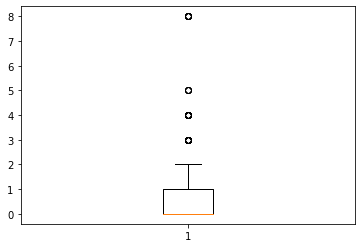

In [41]:
plt.boxplot(df["SibSp"])
plt.show()

In [42]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')

In [43]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [44]:
IQR=Q3-Q1
IQR

1.0

In [45]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [46]:
out=[]
for i in df["SibSp"]:
    if [i]>up_lim or [i]<low_lim:
        out.append(i)

In [47]:
ind_up_lim=df['SibSp']>up_lim
outl_1=df.loc[ind_up_lim].index


In [48]:
outl_1

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [49]:
df=df.drop([24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],axis=0)

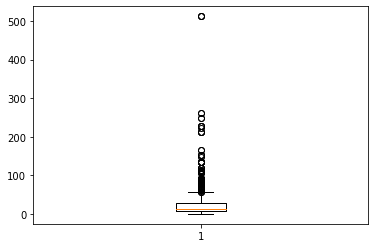

In [50]:
plt.boxplot(df["Fare"])
plt.show()

In [51]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')

In [52]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [53]:
IQR=Q3-Q1
IQR

19.8542

In [54]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-21.885499999999997
57.5313


In [55]:
out=[]
for i in df["Fare"]:
    if [i]>up_lim or [i]<low_lim:
        out.append(i)

In [56]:
ind_up_lim=df['Fare']>up_lim
outl_1=df.loc[ind_up_lim].index

In [57]:
outl_1

Int64Index([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=102)

In [58]:
df=df.drop(outl_1)

In [59]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [60]:
#After removing null values and ut liers next we can remove unwanted features from the data set before spliting data to test and train

In [61]:
df["Name"].nunique() # so name wont provide any meaningful information,so we can remove.

684

In [62]:
df=df.drop("Name",axis=1)

In [63]:
df["Ticket"].nunique()# so name wont provide any meaningful information,so we can remove.

592

In [64]:
df=df.drop("Ticket",axis=1)

In [65]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [66]:
df=pd.get_dummies(df)

In [67]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [68]:
#Now we have completed EDA process

In [69]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [70]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [71]:
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 684, dtype: int64

In [72]:
#Now i am doing MinMax Scaling on X data set before splitting into test train

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
mc=MinMaxScaler()

In [75]:
scaled_data=mc.fit_transform(X)

In [76]:
X=pd.DataFrame(scaled_data,columns=["Pclass","Age","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"])

In [77]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.372549,0.5,0.000000,0.127193,0.0,1.0,0.0,0.0,1.0
1,1.0,0.450980,0.0,0.000000,0.139035,1.0,0.0,0.0,0.0,1.0
2,0.0,0.627451,0.5,0.000000,0.931579,1.0,0.0,0.0,0.0,1.0
3,1.0,0.627451,0.0,0.000000,0.141228,0.0,1.0,0.0,0.0,1.0
4,1.0,0.490196,0.0,0.000000,0.148391,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
679,0.5,0.470588,0.0,0.000000,0.228070,0.0,1.0,0.0,0.0,1.0
680,0.0,0.313725,0.0,0.000000,0.526316,1.0,0.0,0.0,0.0,1.0
681,1.0,0.490196,0.5,0.333333,0.411404,1.0,0.0,0.0,0.0,1.0
682,0.0,0.450980,0.0,0.000000,0.526316,0.0,1.0,1.0,0.0,0.0


### 3. Create kNN and SVM models

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.25,
                                              random_state=43)

In [79]:
#creating Knn Model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [82]:
accuracy_score(y_test,y_pred_knn)*100

79.53216374269006

In [83]:
#Support Vector Machine with kernal=linear

In [84]:
from sklearn import svm 
from sklearn.svm import SVC

In [85]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_svm=svm_linear.predict(X_test)

In [86]:
y_pred_svm

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [87]:
accuracy_score(y_test,y_pred_svm)*100

80.7017543859649

In [88]:
#SVC Model with Kernal as RBF(Radial Basis Function)

In [89]:
svm_rbf=SVC(kernel='rbf')

svm_rbf.fit(X_train,y_train)
y_pred_svm2=svm_rbf.predict(X_test)

In [90]:
y_pred_svm2

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [91]:
accuracy_score(y_test,y_pred_svm2)*100

80.7017543859649

In [92]:
#Doing k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models.


In [93]:
#Cross validation

In [94]:
from sklearn.model_selection import cross_validate

In [95]:
#for knn model
cvs_knn=cross_validate(knn,X,y,cv=10)
print('The cv score for kNN  model is',cvs_knn['test_score'].mean())

The cv score for kNN  model is 0.7984015345268541


In [96]:
#for svm model linear
cvs_svm_linear=cross_validate(svm_linear,X,y,cv=10)
print('The cv score for Support vector machine Classifier (linear) is',cvs_svm_linear['test_score'].mean())

The cv score for Support vector machine Classifier (linear) is 0.7894501278772378


In [97]:
#for svm model rbf
cvs_svm_rbf=cross_validate(svm_rbf,X,y,cv=10)
print('The cv score for Support vector machine Classifier (linear) is',cvs_svm_linear['test_score'].mean())

The cv score for Support vector machine Classifier (linear) is 0.7894501278772378


### 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [98]:
#KFold cross validation for both the models

In [99]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k,random_state=None)

In [100]:
score_knn = []
score_svm = []

In [101]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [102]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    score_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

In [103]:
score_knn 

[0.7518248175182481,
 0.7372262773722628,
 0.8175182481751825,
 0.8029197080291971,
 0.8161764705882353]

In [104]:
score_svm

[0.8102189781021898,
 0.781021897810219,
 0.7956204379562044,
 0.7737226277372263,
 0.8382352941176471]

In [105]:
model=KNeighborsClassifier(n_neighbors=12)
model2=SVC(kernel='linear')
model.fit(X_train,y_train)
pred_values_knn = model.predict(X_test)
model2.fit(X_train,y_train)
pred_values_svm = model2.predict(X_test)

In [106]:
pred_values_knn

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0], dtype=int64)

In [107]:
pred_values_svm

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [108]:
score_knn1=[]

In [109]:
score_svm2=[]

In [110]:
acc= accuracy_score(pred_values_knn , y_test)
score_knn1.append(acc)

In [111]:
acc2= accuracy_score(pred_values_svm , y_test)
score_svm2.append(acc2)

In [112]:
score_knn1 

[0.8308823529411765]

In [113]:
score_svm2

[0.8235294117647058]

In [125]:
from statistics import mean


In [126]:
avg_acc_score_knn = mean(score_knn)
std_acc_score_knn = np.std(score_knn)

In [127]:
avg_acc_score_svm = mean(score_svm)
std_acc_score_svm = np.std(score_svm)

In [128]:
print('accuracy of each fold : {}'.format(score_knn))
print('Avg accuracy : {}'.format(avg_acc_score_knn*100))
print('std accuracy : {}'.format(std_acc_score_knn*100))

accuracy of each fold : [0.7518248175182481, 0.7372262773722628, 0.8175182481751825, 0.8029197080291971, 0.8161764705882353]
Avg accuracy : 78.51331043366253
std accuracy : 3.386253812448469


In [129]:
print('accuracy of each fold : {}'.format(score_svm))
print('Avg accuracy : {}'.format(avg_acc_score_svm*100))
print('std accuracy : {}'.format(std_acc_score_svm*100))

accuracy of each fold : [0.8102189781021898, 0.781021897810219, 0.7956204379562044, 0.7737226277372263, 0.8382352941176471]
Avg accuracy : 79.97638471446973
std accuracy : 2.296055577863169


In [137]:
#StratifiedKFold cross validation for both the models

In [138]:
from sklearn.model_selection import StratifiedKFold

In [139]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

In [140]:
score_knn = []
score_svm = []

In [141]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [142]:
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    score_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

In [143]:
model=KNeighborsClassifier(n_neighbors=12)
model2=SVC(kernel='linear')
model.fit(X_train,y_train)
pred_values_knn = model.predict(X_test)
model2.fit(X_train,y_train)
pred_values_svm = model2.predict(X_test)

In [144]:
score_knn1=[]

In [145]:
score_svm2=[]

In [146]:
acc= accuracy_score(pred_values_knn , y_test)
score_knn1.append(acc)

In [147]:
acc2= accuracy_score(pred_values_svm , y_test)
score_svm2.append(acc2)

In [148]:
score_knn1 

[0.8088235294117647]

In [149]:
score_svm2

[0.7941176470588235]

In [153]:
avg_acc_score_knn = mean(score_knn)
std_acc_score_knn = np.std(score_knn)

In [154]:
avg_acc_score_svm = mean(score_svm)
std_acc_score_svm = np.std(score_svm)

In [155]:
print('accuracy of each fold : {}'.format(score_knn))
print('Avg accuracy : {}'.format(avg_acc_score_knn*100))
print('std accuracy : {}'.format(std_acc_score_knn*100))

accuracy of each fold : [0.8540145985401459, 0.7737226277372263, 0.7591240875912408, 0.7299270072992701, 0.7647058823529411]
Avg accuracy : 77.6298840704165
std accuracy : 4.153574761678498


In [156]:
print('accuracy of each fold : {}'.format(score_svm))
print('Avg accuracy : {}'.format(avg_acc_score_svm*100))
print('std accuracy : {}'.format(std_acc_score_svm*100))

accuracy of each fold : [0.8686131386861314, 0.7445255474452555, 0.8321167883211679, 0.7299270072992701, 0.7867647058823529]
Avg accuracy : 79.23894375268355
std accuracy : 5.217750432764124


In [157]:
#After doing seeing the accuracy score of  the ML modelbefore and after k-fold and StratifiedKFold cross validation, SVM model is performing more than KNN model.


## THE END.